In [1]:
import numpy as np
import time
import h5py
from matplotlib import pyplot as plt
import pickle
import os
from sklearn.manifold import TSNE
from numpy.random import rand
%matplotlib inline
%matplotlib nbagg
import imp
loader = imp.load_source('data_loaders', '../util/data_loaders.py')

In [2]:
def walk_manifold(ims,ts):
    ''' Thanks to this example: http://matplotlib.org/examples/event_handling/pick_event_demo.html
    Function that plots low dim embedding and then displays orig high dim image
    based on what point was clicked
    Args:
        ims (numpy array): array of images -> shape is (num_ims x 8 x 24)
        ts (numpy array:): low dim embedding -> shape (num_ims,2)
'''
    def onpick3(event):
        '''function that executes when point is clicked
        Args
            event (some matplotlib artist): data structure describing point clicked'''
        
        #get index of the point clicked
        ind = event.ind
        
        #pick corresponding image based on the point clicked
        im = ims[ind].reshape(16,24)
        prompt_im = im[:8,:]
        delayed_im = im[8:,:]
       
        #show image
        plt.subplot(211)
        plt.imshow(prompt_im, interpolation='none')
        plt.xlabel("PMT Column")
        plt.ylabel("PMT Ring")
        plt.subplot(212)
        plt.imshow(delayed_im, interpolation='none')
        plt.xlabel("PMT Column")
        plt.ylabel("PMT Ring")
        plt.show()
        
        #show image
        #ax_im.imshow(im, interpolation='none')
        #plt.show()

    #create plot for scattering points
    fig_s, ax_s = plt.subplots()
    col = ax_s.scatter(ts[:,0], ts[:,1],picker=True, s=40)
    
    #create plot for plotting images
    fig1,ax_im = plt.subplots()

    
    #connect interactivity
    fig_s.canvas.mpl_connect('pick_event', onpick3)

    plt.show()



<IPython.core.display.Javascript object>


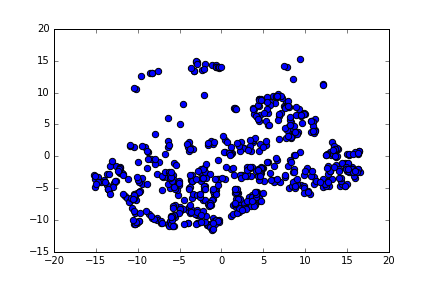

<IPython.core.display.Javascript object>


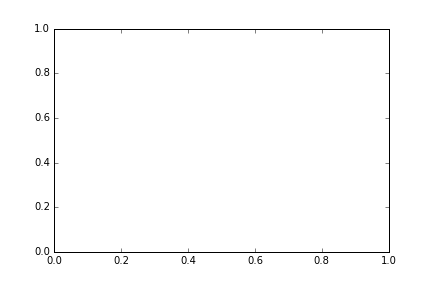

In [4]:
if __name__ == "__main__":
    #orig_input, tsne_output = pickle.load(open('../results/ev-runs/run27/tsne.pkl'))
    tot_num_pairs = 2560
    num_each_kind = tot_num_pairs/2
    ibds, _, _ = loader.get_ibd_data(tot_num_pairs=num_each_kind, train_frac=1, valid_frac=0, just_charges=True)
    accs, _, _ = loader.get_ibd_data(tot_num_pairs=num_each_kind, train_frac=1, valid_frac=0, just_charges=True,
                             path="/global/homes/s/skohn/ml/dayabay-data-conversion/extract_accidentals/accidentals8.h5",
                             h5dataset='accidentals_bg_data')
    orig_input = np.vstack((ibds, accs))
    tsne_output = np.load('/global/homes/s/skohn/ml/dayabay-learn/tsne_w16_indep.npy')
    start_point = 1280
    num = 640
    walk_manifold(orig_input[start_point:start_point+num], tsne_output[start_point:start_point+num])


In [7]:
plt.imshow(orig_input[2000,0], interpolation=None)

IndexError: index 2000 is out of bounds for axis 0 with size 1280

In [2]:

def print_train_results(epoch, num_epochs, start_time, tr_err, tr_acc, logger):
    # Then we print the results for this epoch:
    logger.info("Epoch {} of {} took {:.3f}s".format(epoch + 1, num_epochs, time.time() - start_time))
    logger.info("\ttraining los:\t\t{:.4f}".format(tr_err))
    logger.info("\ttraining acc:\t\t{:.4f} %".format(tr_acc * 100))


def print_val_results(val_err, val_acc, logger):
    logger.info("  validation loss:\t\t{:.6f}".format(val_err))
    logger.info("  validation accuracy:\t\t{:.2f} %".format(val_acc * 100))

def plot_learn_curve(train_errs_or_accs, val_errs_or_accs, val_counter, err_or_acc, save_plots, path):
        plt.figure(1 if err_or_acc == 'err' else 2)
        plt.clf()
        plt.title('Train/Val %s' %(err_or_acc))
        plt.plot(train_errs_or_accs, label='train ' + err_or_acc)
        plt.plot(val_counter, val_errs_or_accs, label='val' + err_or_acc)
        plt.legend( loc = 'center left', bbox_to_anchor = (1.0, 0.5),
           ncol=2)
        if save_plots:
            plt.savefig("%s/%s_learning_curve.png"%(path,err_or_acc))
            plt.show()
        else:
            plt.show()

In [2]:
import numpy as np

In [ ]:
np.random.randint

In [3]:
def plot_side_by_side(x_inps,x_trans,inds,epoch,mode='rec', save=False, path='', cmap=None):
    num_per_row = 2 # cuz reconstructed and original
    plt.clf()
    plt.figure(1, figsize=(60,60))

    count= 1
    for i in inds:
        sp = plt.subplot(inds.shape[0],num_per_row, count)
        sp.imshow(x_inps[i].reshape(16,24), interpolation='none')
        spr = plt.subplot(inds.shape[0],num_per_row, count + 1)
        spr.imshow(x_trans[i].reshape(16,24), interpolation='none', cmap=cmap)
        count+= 2
    #plt.title('Original on left, Reconstructed on Right. Epoch %i' % (epoch))
    if save:
        plt.savefig("%s/epoch_%i_%s.png"%(path,epoch, mode))
        plt.savefig("%s/%s.png"%(path, mode))
        plt.show()
    else:
        plt.show()

In [ ]:
def calc_plot_n_save_tsne(x_train, hlayer, run_dir):
    ts = TSNE(perplexity=50).fit_transform(hlayer)
    with open(os.path.join(run_dir, 'tsne.pkl'), 'w') as f:
        pickle.dump((x_train, ts), f)
    plt.clf()
    plt.scatter(ts[:,0], ts[:,1])
    plt.show()
    plt.savefig(run_dir + '/tsne.png')

In [4]:
# def plot_weights(network, layer_ind):
#     layers = lasagne.layers.get_all_layers()
#     #get weights
#     weights=layers[layer_ind].get_params()[0]
    
    

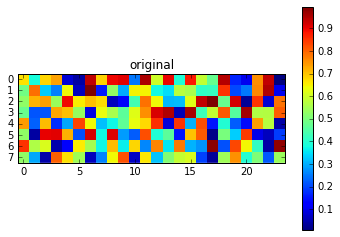

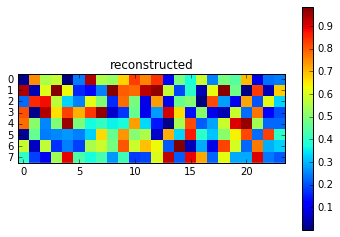

In [5]:
if __name__ == "__main__":
    a=np.random.random((100,8,24))

    plot_reconstruction(a[:30],a[40:])

<IPython.core.display.Javascript object>


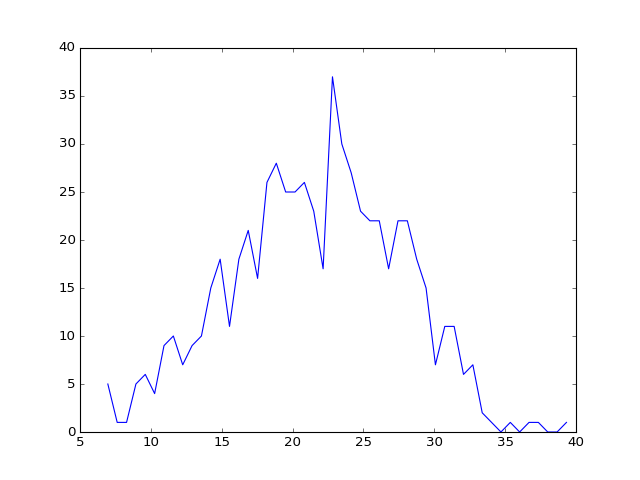

In [28]:
ibdfile = h5py.File('/project/projectdirs/dasrepo/ibd_pairs/all_pairs.h5', 'r')
flatibds = ibdfile['ibd_pair_data'][:640]
energies = np.sum(flatibds[:, :192], axis=1)
h_prompt, edges_prompt = np.histogram(energies, bins=50)
#h_delayed, edges_delayed = np.histogram(energies[:, 1], bins=50)
plt.plot(edges_prompt[:-1], h_prompt)
#plt.plot(edges_delayed[:-1], h_delayed)
plt.show()

In [27]:
ibdfile['ibd_pair_data'].attrs

<Attributes of HDF5 object at 140279688165008>